# Linear Regression

In [134]:
library(UsingR)

In [135]:
data(diamond)

In [136]:
head(diamond)

carat,price
0.17,355
0.16,328
0.17,350
0.18,325
0.25,642
0.16,342


In [137]:
library(ggplot2)

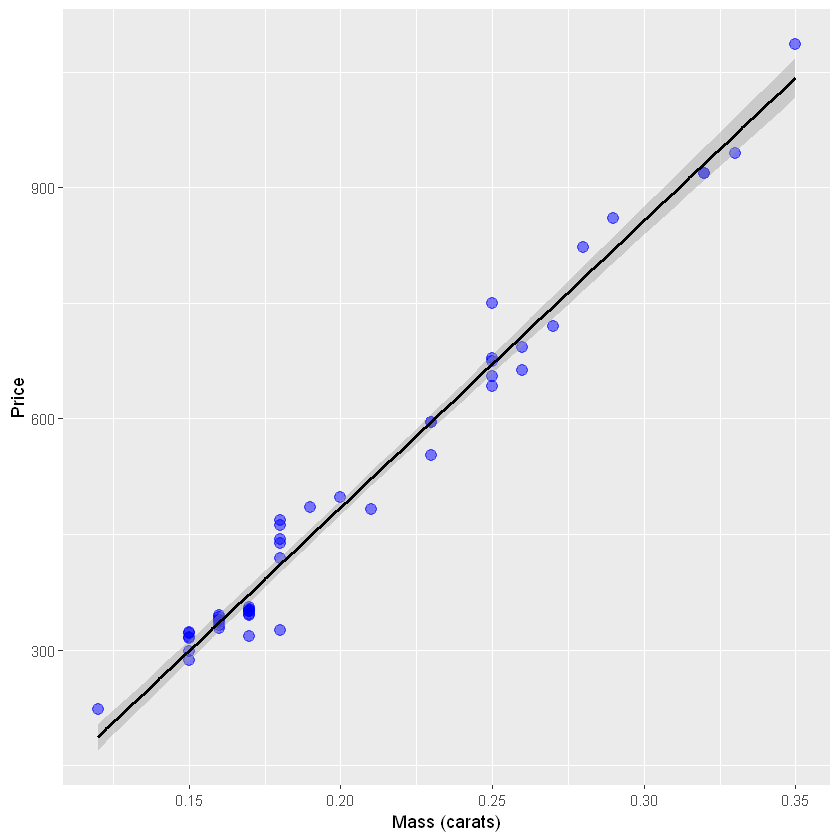

In [138]:
g = ggplot(diamond, aes(x = carat, y = price))
g = g + xlab("Mass (carats)")
g = g + ylab("Price")
g = g + geom_point(size = 3, color = 'blue', alpha = 0.5)
g = g + geom_smooth(method = "lm", color = "black")
g

In [139]:
fit <- lm(price ~ carat, data = diamond)
fit


Call:
lm(formula = price ~ carat, data = diamond)

Coefficients:
(Intercept)        carat  
     -259.6       3721.0  


In [140]:
coef(fit)[1]

(Intercept) 
  -259.6259

In [141]:
coef(fit)[2]

carat 
3721.025

In [142]:
y <- coef(fit)[2] * c(0.25, 0.37, 0.89) + coef(fit)[1]
y

[1]  670.6303 1117.1533 3052.0862

In [143]:
predict(fit, newdata = data.frame(carat = c(0.25, 0.37, 0.89)))

1         2         3 
 670.6303 1117.1533 3052.0862

In [144]:
summary(fit)$r.squared

[1] 0.9782608

### Plot this data on the graph itself

## Residuals

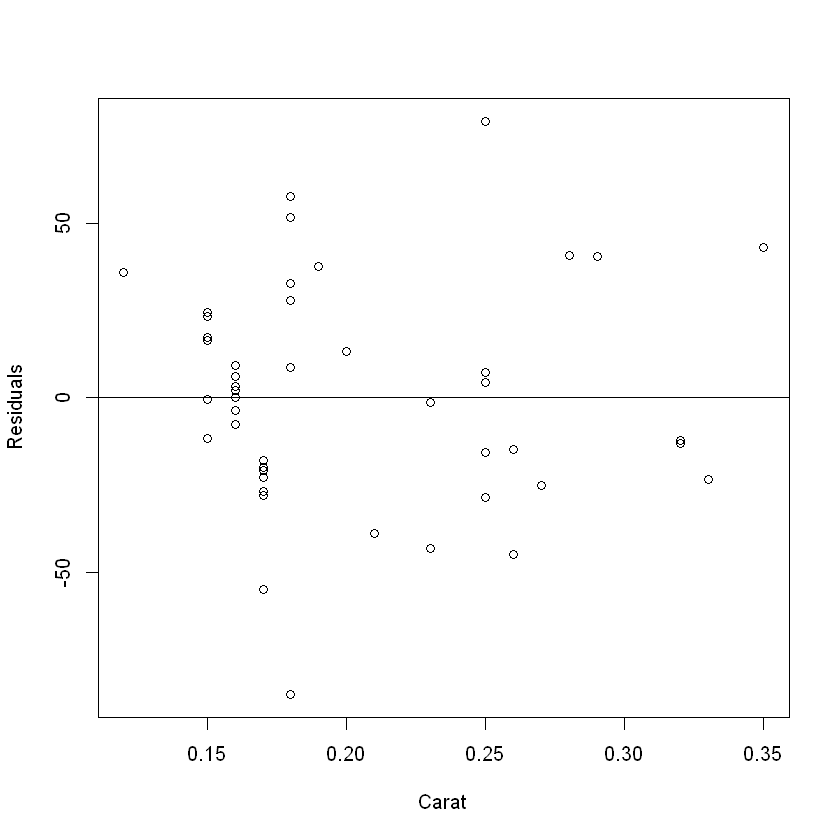

In [145]:
plot(diamond$carat, resid(fit), ylab = "Residuals", xlab = "Carat")
abline(0, 0)

In [146]:
sum_coef <- summary(fit)$coefficient
sum_coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-259.6259,17.31886,-14.99094,2.523271e-19
carat,3721.0249,81.78588,45.49715,6.751260e-40


In [147]:
(sum_coef[2,1] + c(-1,1) * qt(0.975, df = fit$df) * sum_coef[2,2])/10

[1] 355.6398 388.5651

## Draw Ribbon Chart

## Mulitple (Multivariable) Linear Regression

In [148]:
data(mtcars)

In [149]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [150]:
input <- mtcars[, c("mpg", "disp", "hp", "wt")]
head(input)

,mpg,disp,hp,wt
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


In [151]:
summary(lm(mpg ~ disp, data = input))$r.squared

[1] 0.7183433

In [152]:
summary(lm(mpg ~ hp, data = input))$r.squared

[1] 0.6024373

In [153]:
summary(lm(mpg ~ wt, data = input))$r.squared

[1] 0.7528328

In [154]:
model <- lm(mpg ~ disp + hp + wt, data = input)
model


Call:
lm(formula = mpg ~ disp + hp + wt, data = input)

Coefficients:
(Intercept)         disp           hp           wt  
  37.105505    -0.000937    -0.031157    -3.800891  


In [155]:
summary(model)$r.squared

[1] 0.8268361

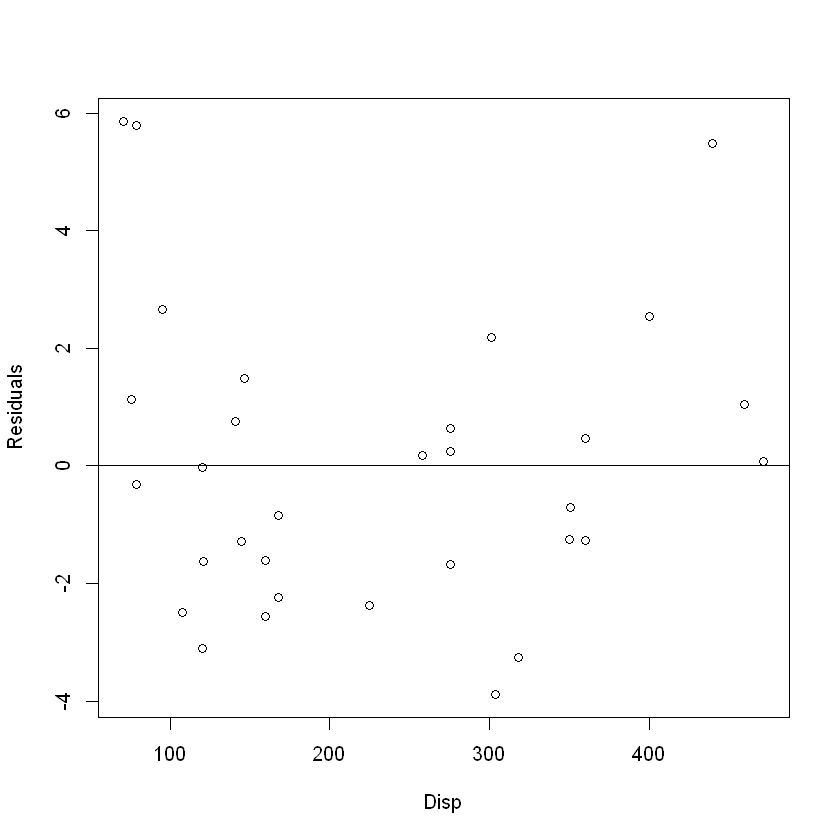

In [156]:
plot(mtcars$disp, resid(model), ylab = "Residuals", xlab = "Disp")
abline(0, 0)

## ANOVA

In [157]:
model1 <- lm(mpg ~ disp, data = input)
model2 <- lm(mpg ~ disp + hp, data = input)
model3 <- lm(mpg ~ disp + hp + wt, data = input)
anova(model1, model2, model3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
30,317.1587,NA,NA,NA,NA
29,283.4934,1,33.66525,4.834216,0.036328627
28,194.9907,1,88.50276,12.708696,0.001330991


In [158]:
input <- mtcars[, c("mpg", "disp", "hp", "wt", "cyl")]
head(input)

,mpg,disp,hp,wt,cyl
Mazda RX4,21.0,160,110,2.620,6
Mazda RX4 Wag,21.0,160,110,2.875,6
Datsun 710,22.8,108,93,2.320,4
Hornet 4 Drive,21.4,258,110,3.215,6
Hornet Sportabout,18.7,360,175,3.440,8
Valiant,18.1,225,105,3.460,6


In [159]:
summary(lm(mpg ~ disp + hp + wt + cyl, data = input))$r.squared

[1] 0.8486348

In [160]:
model1 <- lm(mpg ~ disp + hp + wt, data = input)
model2 <- lm(mpg ~ disp + hp + wt + cyl, data = input)
anova(model1, model2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
28,194.9907,NA,NA,NA,NA
27,170.4444,1,24.54631,3.888368,0.05894681


## Polynomial Regression

In [161]:
head(diamond)

carat,price
0.17,355
0.16,328
0.17,350
0.18,325
0.25,642
0.16,342


In [162]:
poly_fit <- lm(price ~ poly(carat, 3, raw = TRUE), data = diamond)
coef(poly_fit)
summary(poly_fit)$r.squared

(Intercept) poly(carat, 3, raw = TRUE)1 
                   1.856795                  490.114305 
poly(carat, 3, raw = TRUE)2 poly(carat, 3, raw = TRUE)3 
               12438.573668               -15044.759619

[1] 0.9791144

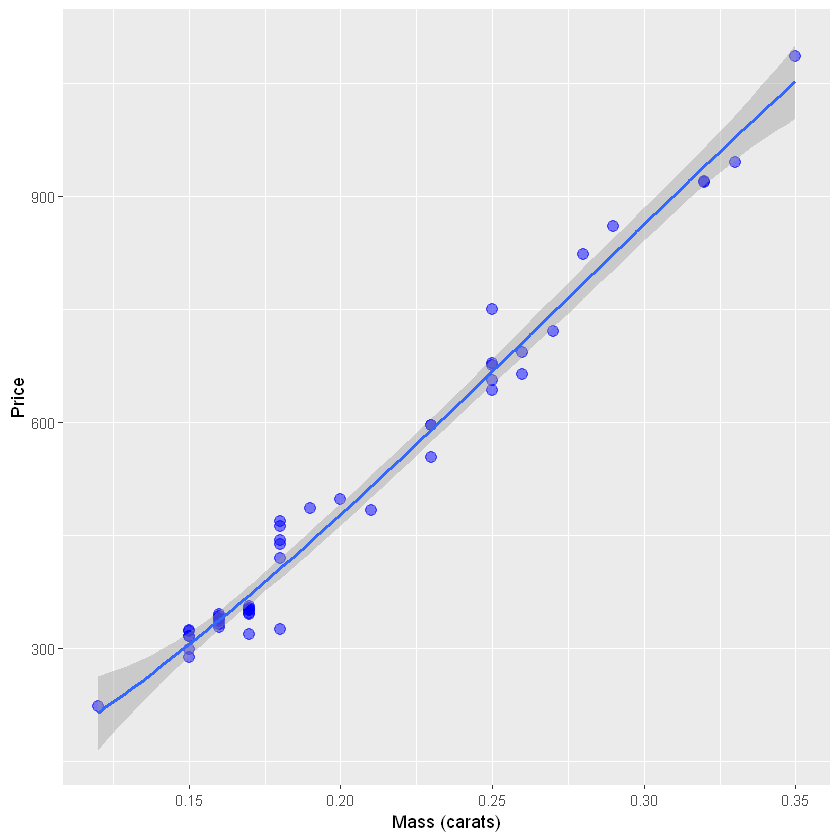

In [163]:
x <- diamond$carat
y <- diamond$price
g = ggplot(diamond, aes(x = carat, y = price))
g = g + xlab("Mass (carats)")
g = g + ylab("Price")
g = g + geom_point(size = 3, color = 'blue', alpha = 0.5)
g = g + stat_smooth(method = lm, formula = y ~ poly(x, 3, raw = TRUE))
g

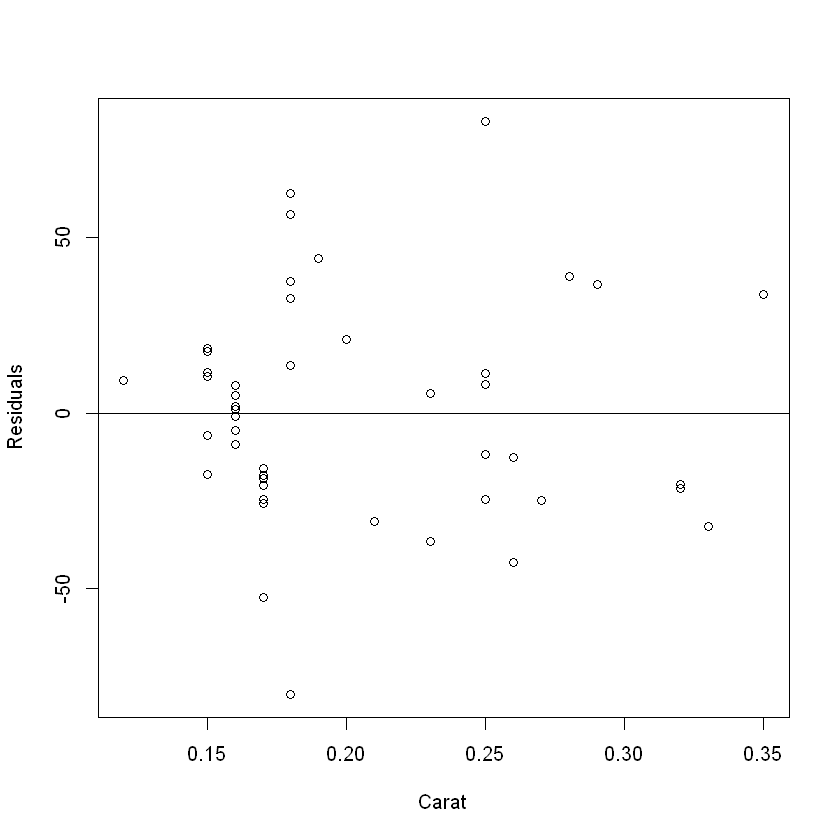

In [164]:
plot(diamond$carat, resid(poly_fit), ylab = "Residuals", xlab = "Carat")
abline(0, 0)

In [165]:
input <- mtcars[, c("mpg", "disp", "hp", "wt")]
head(input)

,mpg,disp,hp,wt
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


## Multiple Polynomial Regression

In [187]:
m_poly_fit <- lm(mpg ~ poly(disp, 3, raw = T) + poly(hp, 3, raw = T) + poly(wt, 3, raw = T), data = mtcars)
summary(m_poly_fit)$r.squared

[1] 0.9172112

# Logistic Regression

In [167]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [168]:
input <- mtcars[, c("am", "cyl", "hp", "wt")]
head(input)

,am,cyl,hp,wt
Mazda RX4,1,6,110,2.620
Mazda RX4 Wag,1,6,110,2.875
Datsun 710,1,4,93,2.320
Hornet 4 Drive,0,6,110,3.215
Hornet Sportabout,0,8,175,3.440
Valiant,0,6,105,3.460


In [169]:
model <- glm(formula = am ~ cyl + hp + wt, data = input, family = "binomial")
model


Call:  glm(formula = am ~ cyl + hp + wt, family = "binomial", data = input)

Coefficients:
(Intercept)          cyl           hp           wt  
   19.70288      0.48760      0.03259     -9.14947  

Degrees of Freedom: 31 Total (i.e. Null);  28 Residual
Null Deviance:	    43.23 
Residual Deviance: 9.841 	AIC: 17.84

In [170]:
summary(model)


Call:
glm(formula = am ~ cyl + hp + wt, family = "binomial", data = input)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.17272  -0.14907  -0.01464   0.14116   1.27641  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) 19.70288    8.11637   2.428   0.0152 *
cyl          0.48760    1.07162   0.455   0.6491  
hp           0.03259    0.01886   1.728   0.0840 .
wt          -9.14947    4.15332  -2.203   0.0276 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.2297  on 31  degrees of freedom
Residual deviance:  9.8415  on 28  degrees of freedom
AIC: 17.841

Number of Fisher Scoring iterations: 8


In [171]:
input[17,]
prob <- predict(model, newdata = input[17,-1], type="response")
ifelse(prob > 0.5, 1, 0)

,am,cyl,hp,wt
Chrysler Imperial,0,8,230,5.345


Chrysler Imperial 
                0

In [172]:
input[27,]
prob <- predict(model, newdata = input[27, -1], type="response")
ifelse(prob > 0.5, 1, 0)

,am,cyl,hp,wt
Porsche 914-2,1,4,91,2.14


Porsche 914-2 
            1

In [173]:
d = data.frame(cyl = 9, hp = 300, wt = 7)
prob <- predict(model, newdata = d, type="response")
ifelse(prob > 0.5, 1, 0)

1 
0

## Practice Dataset

In [174]:
data(Seatbelts)

In [175]:
seat_belts <- as.data.frame(Seatbelts)

In [176]:
head(seat_belts)

DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
107,1687,867,269,9059,0.1029718,12,0
97,1508,825,265,7685,0.1023630,6,0
102,1507,806,319,9963,0.1020625,12,0
87,1385,814,407,10955,0.1008733,8,0
119,1632,991,454,11823,0.1010197,10,0
106,1511,945,427,12391,0.1005812,13,0


# Logistic Regression

In [3]:
quality = read.csv("./data/quality.csv")

In [4]:
head(quality)

MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
1,0,0,18,1,731,10,18,21,93,222,FALSE,0,0
2,1,1,6,1,411,0,8,27,19,115,FALSE,1,0
3,0,0,5,3,731,10,5,16,27,148,FALSE,5,0
4,0,1,19,0,158,34,20,14,59,242,FALSE,0,0
5,8,2,19,3,449,10,29,24,51,204,FALSE,0,0
6,2,0,9,2,731,6,11,40,53,156,FALSE,4,1


In [5]:
str(quality)

'data.frame':	131 obs. of  14 variables:
 $ MemberID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ InpatientDays       : int  0 1 0 0 8 2 16 2 2 4 ...
 $ ERVisits            : int  0 1 0 1 2 0 1 0 1 2 ...
 $ OfficeVisits        : int  18 6 5 19 19 9 8 8 4 0 ...
 $ Narcotics           : int  1 1 3 0 3 2 1 0 3 2 ...
 $ DaysSinceLastERVisit: num  731 411 731 158 449 ...
 $ Pain                : int  10 0 10 34 10 6 4 5 5 2 ...
 $ TotalVisits         : int  18 8 5 20 29 11 25 10 7 6 ...
 $ ProviderCount       : int  21 27 16 14 24 40 19 11 28 21 ...
 $ MedicalClaims       : int  93 19 27 59 51 53 40 28 20 17 ...
 $ ClaimLines          : int  222 115 148 242 204 156 261 87 98 66 ...
 $ StartedOnCombination: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ AcuteDrugGapSmall   : int  0 1 5 0 0 4 0 0 0 0 ...
 $ PoorCare            : int  0 0 0 0 0 1 0 0 1 0 ...


In [6]:
table(quality$PoorCare)


 0  1 
98 33 

In [8]:
98/(98+33)

[1] 0.7480916

In [10]:
install.packages("caTools")

also installing the dependency 'bitops'



package 'bitops' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\satha\AppData\Local\Temp\Rtmpa6WYA5\downloaded_packages


In [12]:
library(caTools)

In [13]:
set.seed(16)
split <- sample.split(quality$PoorCare, SplitRatio = 0.70)

In [15]:
qualityTrain <- subset(quality, split == TRUE)
qualityTest <- subset(quality, split == FALSE)

In [16]:
nrow(qualityTrain)

[1] 92

In [17]:
nrow(qualityTest)

[1] 39

In [18]:
nrow(quality)

[1] 131

In [20]:
model <- glm(PoorCare ~ OfficeVisits + Narcotics, data = qualityTrain, family = 'binomial')

In [22]:
predict <- predict(model, newdata = qualityTest, type = "response")

In [48]:
predict <- predict(model, newdata = qualityTest, type = "response")
predict <- ifelse(predict >= 0.5, 1, 0)
accuracy <- table(predict, qualityTest$PoorCare)
accuracy

       
predict  0  1
      0 28  6
      1  1  4

In [37]:
acc <- (28+4)/(28+6+1+4)
acc

[1] 0.8205128

In [51]:
predict <- predict(model, newdata = qualityTest, type = "response")
predict <- ifelse(predict >= 0.2, 1, 0)
accuracy <- table(predict, qualityTest$PoorCare)
accuracy
acc <- (18+6)/(18+4+11+6)
acc

       
predict  0  1
      0 18  4
      1 11  6

[1] 0.6153846

In [52]:
predict <- predict(model, newdata = qualityTest, type = "response")
predict <- ifelse(predict >= 0.7, 1, 0)
accuracy <- table(predict, qualityTest$PoorCare)
accuracy
acc <- (29+3)/(29+7+0+3)
acc

       
predict  0  1
      0 29  7
      1  0  3

[1] 0.8205128

In [38]:
install.packages("ROCR")

also installing the dependencies 'gtools', 'gdata', 'gplots'



package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\satha\AppData\Local\Temp\Rtmpa6WYA5\downloaded_packages


In [40]:
library("ROCR")

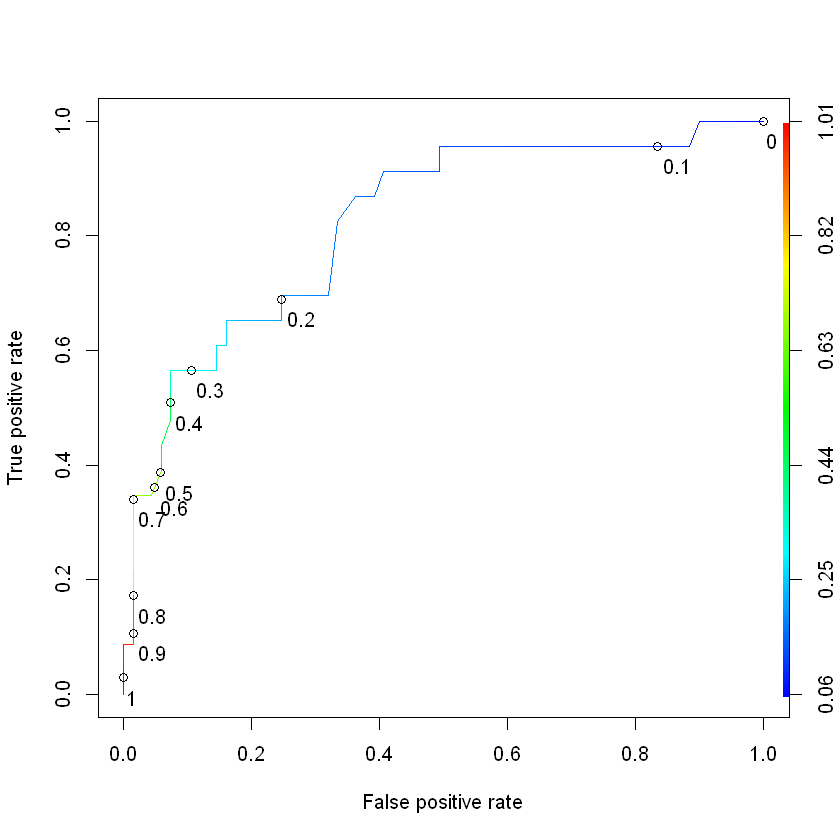

In [44]:
predictTrain <- predict(model, type = "response")
ROCRpred <- prediction(predictTrain, qualityTrain$PoorCare)
ROCRperf <- performance(ROCRpred, "tpr", "fpr")
plot(ROCRperf, colorize = TRUE, print.cutoffs.at = seq(0,1,by=0.1), text.adj = c(-0.2, 1.7))